In [329]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [330]:
food = pd.read_pickle("food.pkl")
restaurants = pd.read_pickle("restaurants.pkl")

# Inspection Count per Facility Type

In [331]:
food_meaned = food.drop_duplicates(subset="License #")
# To be added to cleaner.ipynb
food_meaned = food[food["License #"] != 0]
food_meaned = food.drop_duplicates(subset=["Latitude", "Longitude"])
food_meaned = food_meaned.groupby("Facility Type").count()['Inspection ID'].sort_values(ascending=False)

In [332]:
inspection_count_per_facility = food.groupby("Facility Type").count()['Inspection ID'].sort_values(ascending=False)

In [333]:
inspection_count_per_facility_meaned = inspection_count_per_facility / food_meaned

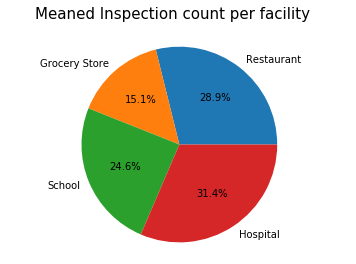

In [334]:
labels = inspection_count_per_facility_meaned.keys()
sizes = inspection_count_per_facility_meaned.values

fig1, ax1 = plt.subplots()
fig1.suptitle("Meaned Inspection count per facility", fontsize=15)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 

plt.show()

### Inspection Count per year per Facility Type

In [335]:
years = food["Inspection Date"].unique()
years_2x5 = years.reshape((2, 5))

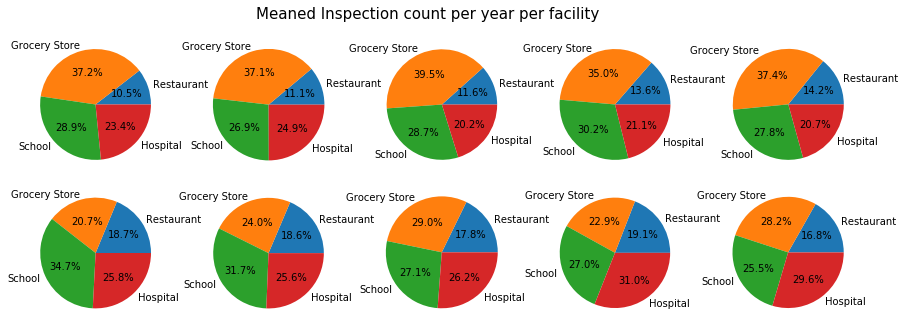

In [336]:
labels = inspection_count_per_facility_meaned.keys()
fig, ax= plt.subplots(2,5,figsize=(15,5))
fig.suptitle("Meaned Inspection count per year per facility", fontsize=15)
for i in range(2):
    for j in range(5):
        data = food[food["Inspection Date"] == years_2x5[i, j]]
        data = data.groupby("Facility Type").count()['Inspection ID'].sort_values()
        data = data / food_meaned
        sizes = data.values

        ax[i, j].pie(sizes, labels=labels, autopct='%1.1f%%')
        ax[i, j].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Inspection Count per Facility Type over year

In [337]:
facilities = food["Facility Type"].unique()

In [338]:
restaurant_inspection_count = food[food["Facility Type"] == "Restaurant"].groupby("Inspection Date").count()['Inspection ID'].sort_index() / food_meaned['Restaurant']
grocery_inspection_count = food[food["Facility Type"] == "Grocery Store"].groupby("Inspection Date").count()['Inspection ID'].sort_index() / food_meaned['Grocery Store']
school_inspection_count = food[food["Facility Type"] == "School"].groupby("Inspection Date").count()['Inspection ID'].sort_index() / food_meaned['School']
hospital_inspection_count = food[food["Facility Type"] == "Hospital"].groupby("Inspection Date").count()['Inspection ID'].sort_index() / food_meaned['Hospital']

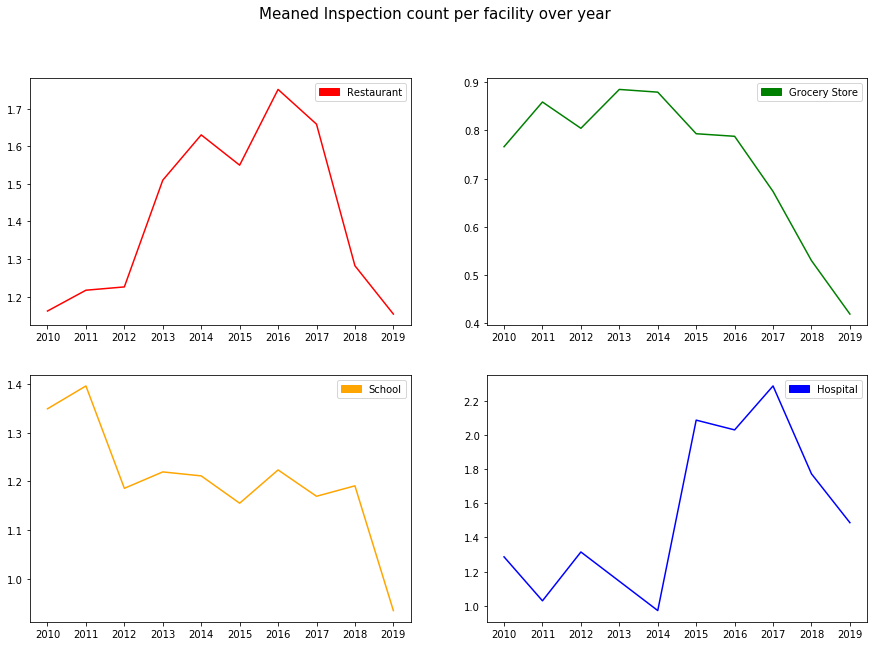

In [339]:
fig, ax= plt.subplots(2,2, figsize=(15, 10))
fig.suptitle("Meaned Inspection count per facility over year", fontsize=15)

ax[0, 0].plot(restaurant_inspection_count, 'red')
ax[0, 1].plot(grocery_inspection_count, 'green')
ax[1, 0].plot(school_inspection_count, 'orange')
ax[1, 1].plot(hospital_inspection_count, 'blue')

ax[0, 0].legend(handles=[mpatches.Patch(color='red', label='Restaurant')])
ax[0, 1].legend(handles=[mpatches.Patch(color='green', label='Grocery Store')])
ax[1, 0].legend(handles=[mpatches.Patch(color='orange', label='School')])
ax[1, 1].legend(handles=[mpatches.Patch(color='blue', label='Hospital')])

plt.show()

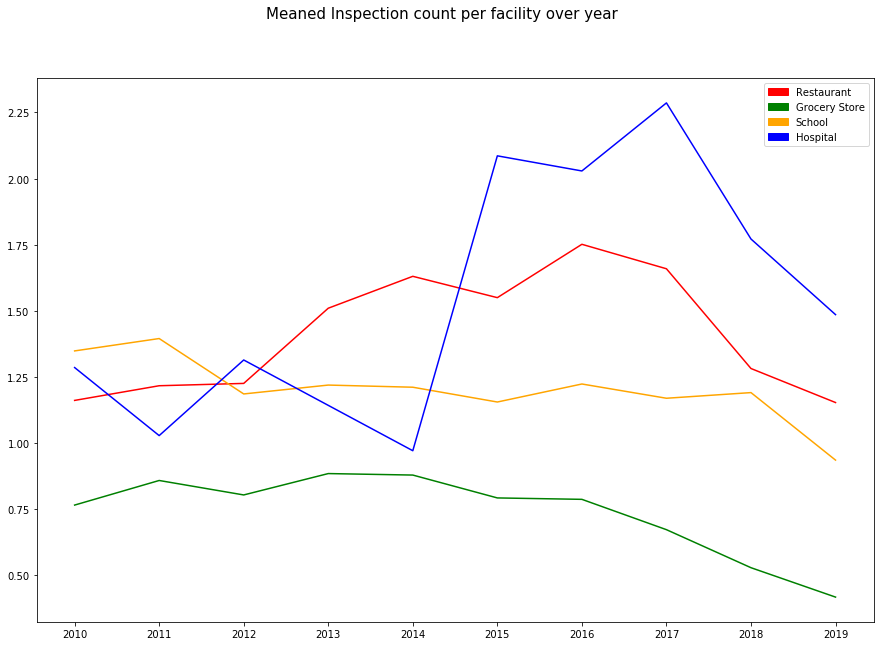

In [340]:
fig = plt.figure(figsize = (15, 10))
fig.suptitle("Meaned Inspection count per facility over year", fontsize=15)

plt.plot(restaurant_inspection_count, 'red')
plt.plot(grocery_inspection_count, 'green')
plt.plot(school_inspection_count, 'orange')
plt.plot(hospital_inspection_count, 'blue')

red_patch = mpatches.Patch(color='red', label='Restaurant')
green_patch = mpatches.Patch(color='green', label='Grocery Store')
orange_patch = mpatches.Patch(color='orange', label='School')
blue_patch = mpatches.Patch(color='blue', label='Hospital')

plt.legend(handles=[red_patch, green_patch, orange_patch, blue_patch])

plt.show()

### Inspection Count per Facility Type per Inspection Types

In [382]:
# Filter only most recurrents inspection types
inspectype = ['Canvass', 'Complaint', 'License', 'Suspected Food Poisoning']

food_inspectype_filtered = food.copy()
# group License, License Re-Inspection
food_inspectype_filtered.loc[food_inspectype_filtered['Inspection Type'] == 'License Re-Inspection'] = 'License'
# group Canvass, Canvass Re-Inspection
food_inspectype_filtered.loc[food_inspectype_filtered['Inspection Type'] == 'Canvass Re-Inspection'] = 'Canvass'
# group Complaint, Short Form Complaint, Complaint Re-Inspection
food_inspectype_filtered.loc[food_inspectype_filtered['Inspection Type'].isin(['Short Form Complaint', 'Complaint Re-Inspection'])] = 'Complaint'
# group Suspected Food Poisoning, Suspected Food Poisoning Re-Inspection
food_inspectype_filtered.loc[food_inspectype_filtered['Inspection Type'] == 'Suspected Food Poisoning Re-inspection'] = 'Suspected Food Poisoning'

food_inspectype_filtered = food_inspectype_filtered[food_inspectype_filtered['Inspection Type'].isin(inspectype)]

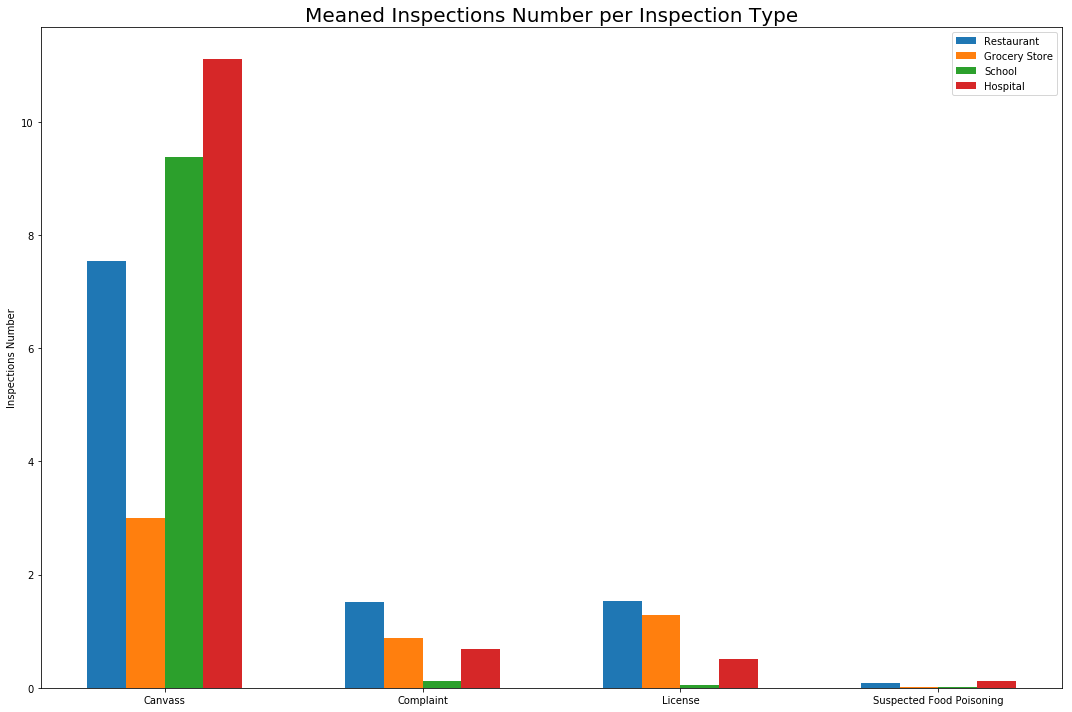

In [387]:
labels = inspectype
resto_inspection_filt_count = food_inspectype_filtered[food_inspectype_filtered["Facility Type"] == "Restaurant"].groupby("Inspection Type").count()['Inspection ID'].sort_index() / food_meaned['Restaurant']
grocery_inspection_filt_count = food_inspectype_filtered[food_inspectype_filtered["Facility Type"] == "Grocery Store"].groupby("Inspection Type").count()['Inspection ID'].sort_index() / food_meaned['Grocery Store']
school_inspection_filt_count = food_inspectype_filtered[food_inspectype_filtered["Facility Type"] == "School"].groupby("Inspection Type").count()['Inspection ID'].sort_index() / food_meaned['School']
hospital_inspection_filt_count = food_inspectype_filtered[food_inspectype_filtered["Facility Type"] == "Hospital"].groupby("Inspection Type").count()['Inspection ID'].sort_index() / food_meaned['Hospital']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize = (15, 10))
rects1 = ax.bar(x - 3*width/2, resto_inspection_filt_count, width, label='Restaurant')
rects2 = ax.bar(x - width/2, grocery_inspection_filt_count, width, label='Grocery Store')
rects3 = ax.bar(x + width/2, school_inspection_filt_count, width, label='School')
rects4 = ax.bar(x + 3*width/2, hospital_inspection_filt_count, width, label='Hospital')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Inspections Number')
ax.set_title('Meaned Inspections Number per Inspection Type', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Inspection Count per Restaurant

In [341]:
inspection_count_per_restaurant = restaurants.groupby("AKA Name").count()['Inspection ID'].sort_values(ascending=False)

In [342]:
restaurant_meaned = restaurants.drop_duplicates(subset="License #")
# To be added to cleaner.ipynb
restaurant_meaned = restaurant_meaned[restaurant_meaned["License #"] != 0]
restaurant_meaned = restaurant_meaned.drop_duplicates(subset=["Latitude", "Longitude"])
restaurant_meaned = restaurant_meaned.groupby("AKA Name").count()['Inspection ID'].sort_values(ascending=False)

In [343]:
inspection_count_per_resataurant_meaned = inspection_count_per_restaurant / restaurant_meaned

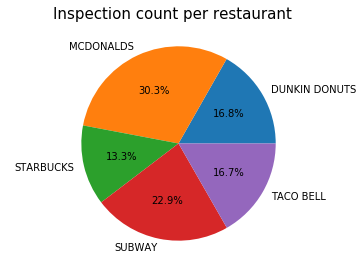

In [344]:
labels = inspection_count_per_resataurant_meaned.keys()
sizes = inspection_count_per_resataurant_meaned.values

fig1, ax1 = plt.subplots()
fig1.suptitle("Inspection count per restaurant", fontsize=15)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 

plt.show()

### Inspection Count per year per Restaurant

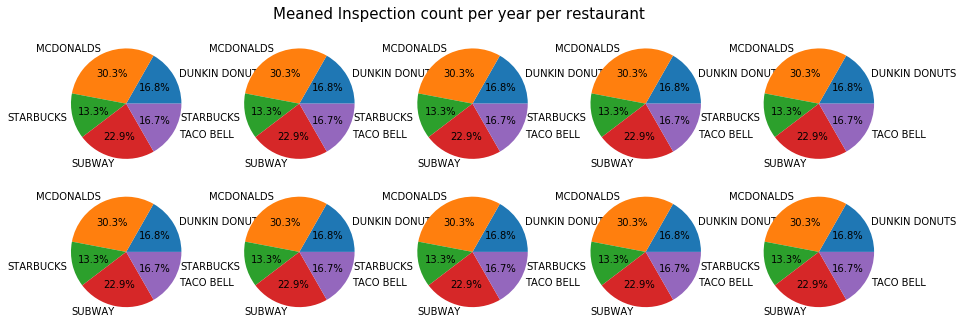

In [345]:
labels = inspection_count_per_resataurant_meaned.keys()
fig, ax= plt.subplots(2,5,figsize=(15,5))
fig.suptitle("Meaned Inspection count per year per restaurant", fontsize=15)
for i in range(2):
    for j in range(5):
        data = restaurants[restaurants["Inspection Date"] == years_2x5[i, j]]
        data = restaurants.groupby("AKA Name").count()['Inspection ID'].sort_values()
        data = data / restaurant_meaned
        sizes = data.values

        ax[i, j].pie(sizes, labels=labels, autopct='%1.1f%%')
        ax[i, j].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Inspection Count per Restaurant over year

In [353]:
MCDO_inspection_count = restaurants[restaurants["AKA Name"] == "MCDONALDS"].groupby("Inspection Date").count()['Inspection ID'].sort_index() / restaurant_meaned['MCDONALDS']
DUNKIN_inspection_count = restaurants[restaurants["AKA Name"] == "DUNKIN DONUTS"].groupby("Inspection Date").count()['Inspection ID'].sort_index() / restaurant_meaned['DUNKIN DONUTS']
TACO_inspection_count = restaurants[restaurants["AKA Name"] == "TACO BELL"].groupby("Inspection Date").count()['Inspection ID'].sort_index() / restaurant_meaned['TACO BELL']
SUBWAY_inspection_count = restaurants[restaurants["AKA Name"] == "SUBWAY"].groupby("Inspection Date").count()['Inspection ID'].sort_index() / restaurant_meaned['SUBWAY']
STARBUCKS_inspection_count = restaurants[restaurants["AKA Name"] == "STARBUCKS"].groupby("Inspection Date").count()['Inspection ID'].sort_index() / restaurant_meaned['STARBUCKS']

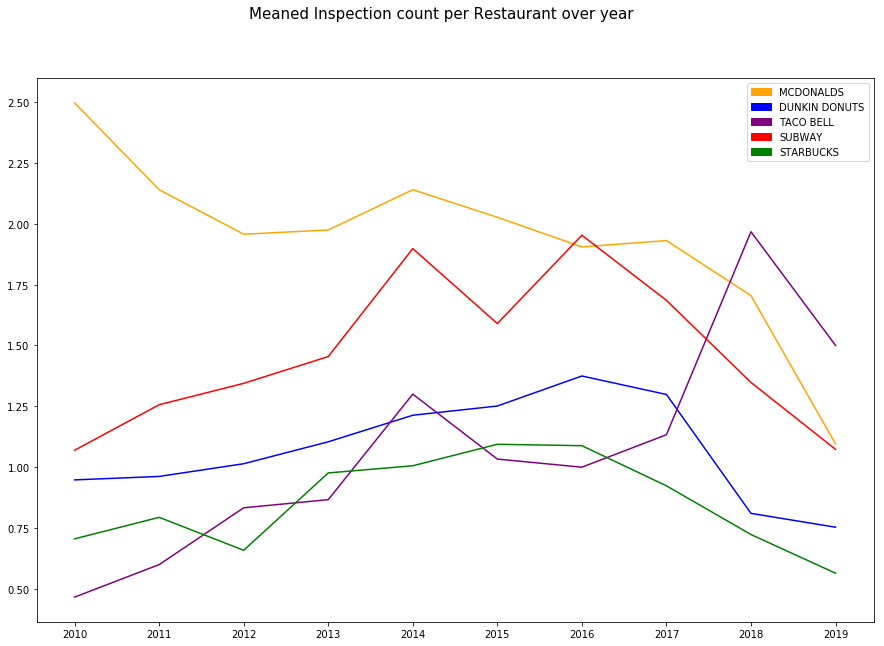

In [354]:
fig = plt.figure(figsize = (15, 10))
fig.suptitle("Meaned Inspection count per Restaurant over year", fontsize=15)

plt.plot(MCDO_inspection_count, 'orange')
plt.plot(DUNKIN_inspection_count, 'blue')
plt.plot(TACO_inspection_count, 'purple')
plt.plot(SUBWAY_inspection_count, 'red')
plt.plot(STARBUCKS_inspection_count, 'green')

orange_patch = mpatches.Patch(color='orange', label='MCDONALDS')
blue_patch = mpatches.Patch(color='blue', label='DUNKIN DONUTS')
purple_patch = mpatches.Patch(color='purple', label='TACO BELL')
red_patch = mpatches.Patch(color='red', label='SUBWAY')
green_patch = mpatches.Patch(color='green', label='STARBUCKS')

plt.legend(handles=[orange_patch, blue_patch, purple_patch, red_patch, green_patch])

plt.show()

### Inspection Count per Restaurant per Inspection Types

In [352]:
# Filter only most recurrents inspection types
inspectype = ['Canvass', 'Complaint', 'License', 'Suspected Food Poisoning']

restaurants_inspectype_filtered = restaurants.copy()
# group License, License Re-Inspection
restaurants_inspectype_filtered.loc[restaurants_inspectype_filtered['Inspection Type'] == 'License Re-Inspection'] = 'License'
# group Canvass, Canvass Re-Inspection
restaurants_inspectype_filtered.loc[restaurants_inspectype_filtered['Inspection Type'] == 'Canvass Re-Inspection'] = 'Canvass'
# group Complaint, Short Form Complaint, Complaint Re-Inspection
restaurants_inspectype_filtered.loc[restaurants_inspectype_filtered['Inspection Type'].isin(['Short Form Complaint', 'Complaint Re-Inspection'])] = 'Complaint'
# group Suspected Food Poisoning, Suspected Food Poisoning Re-Inspection
restaurants_inspectype_filtered.loc[restaurants_inspectype_filtered['Inspection Type'] == 'Suspected Food Poisoning Re-inspection'] = 'Suspected Food Poisoning'

restaurants_inspectype_filtered = restaurants_inspectype_filtered[restaurants_inspectype_filtered['Inspection Type'].isin(inspectype)]

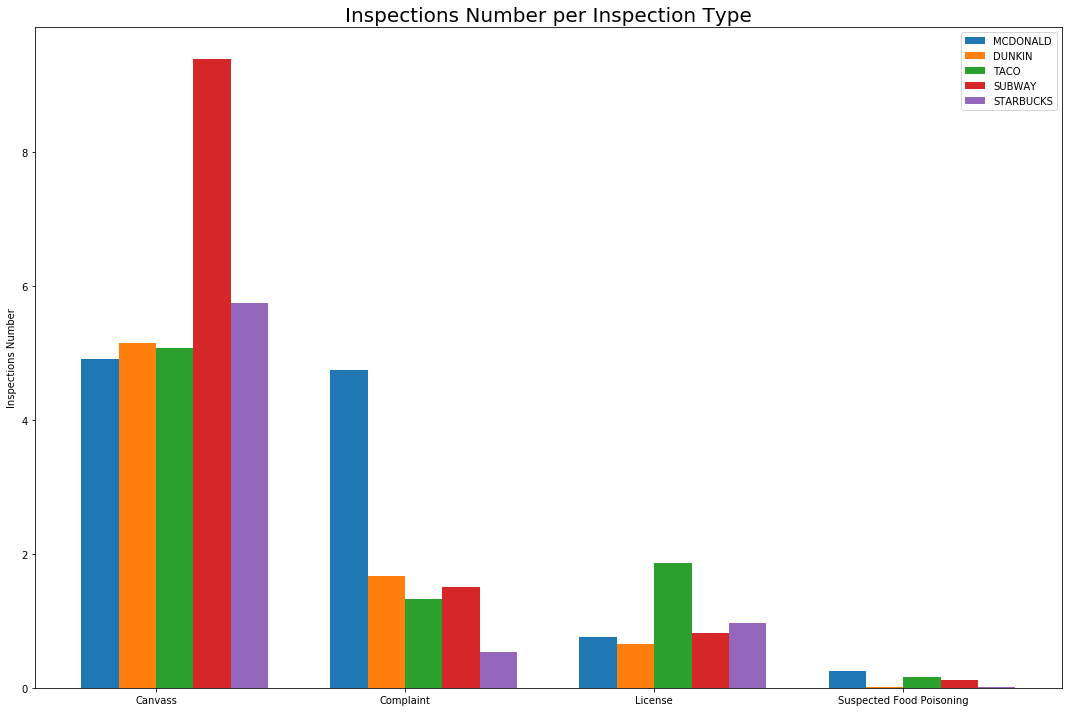

In [377]:
labels = inspectype
MCDO_inspection_filt_count = restaurants_inspectype_filtered[restaurants_inspectype_filtered["AKA Name"] == "MCDONALDS"].groupby("Inspection Type").count()['Inspection ID'].sort_index() / restaurant_meaned['MCDONALDS']
DUNKIN_inspection_filt_count = restaurants_inspectype_filtered[restaurants_inspectype_filtered["AKA Name"] == "DUNKIN DONUTS"].groupby("Inspection Type").count()['Inspection ID'].sort_index() / restaurant_meaned['DUNKIN DONUTS']
TACO_inspection_filt_count = restaurants_inspectype_filtered[restaurants_inspectype_filtered["AKA Name"] == "TACO BELL"].groupby("Inspection Type").count()['Inspection ID'].sort_index() / restaurant_meaned['TACO BELL']
SUBWAY_inspection_filt_count = restaurants_inspectype_filtered[restaurants_inspectype_filtered["AKA Name"] == "SUBWAY"].groupby("Inspection Type").count()['Inspection ID'].sort_index() / restaurant_meaned['SUBWAY']
STARBUCKS_inspection_filt_count = restaurants_inspectype_filtered[restaurants_inspectype_filtered["AKA Name"] == "STARBUCKS"].groupby("Inspection Type").count()['Inspection ID'].sort_index() / restaurant_meaned['STARBUCKS']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize = (15, 10))
rects1 = ax.bar(x - 3*width/2, MCDO_inspection_filt_count, width, label='MCDONALD')
rects2 = ax.bar(x - width/2, DUNKIN_inspection_filt_count, width, label='DUNKIN')
rects3 = ax.bar(x + width/2, TACO_inspection_filt_count, width, label='TACO')
rects4 = ax.bar(x + 3*width/2, SUBWAY_inspection_filt_count, width, label='SUBWAY')
rects5 = ax.bar(x + 5*width/2, STARBUCKS_inspection_filt_count, width, label='STARBUCKS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Inspections Number')
ax.set_title('Inspections Number per Inspection Type', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()